In [10]:
import pandas as pd
import numpy as np
import pandas as pd
import statistics
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import statistics as stat
from scipy.stats import binom
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Rectangle
# splitting merge_data into train test and split
from sklearn.model_selection import train_test_split, cross_validate
from scipy import stats
from scipy.stats import normaltest
import os 
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import matplotlib as mpl
import warnings; warnings.filterwarnings(action='once')
# to keep track of training time
import datetime
# logistic regression model
from sklearn.linear_model import LogisticRegression
# metrics used for evaluation
from sklearn.metrics import f1_score, matthews_corrcoef
# visualizations
from yellowbrick.classifier import ClassPredictionError, ConfusionMatrix
from sklearn.metrics import plot_roc_curve
# KNN imputation
from sklearn.impute import KNNImputer
# normalizer
from sklearn.preprocessing import Normalizer
# variance threshold
from sklearn.feature_selection import VarianceThreshold
# RFECV
from sklearn.model_selection import StratifiedKFold
# random forest
from sklearn.ensemble import RandomForestClassifier
# evaluation metric
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [11]:
#read the file
df = pd.read_csv("LoanStats.csv")

In [12]:
#checking the numbers of columns and rows in the dataframe
df.shape

(39786, 7)

In [13]:
#checking first 5 rows to see whether the right variables are in the dataset
df.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


## Data Understanding

In [58]:
#checking datatypes 
df.dtypes

int_rate          float64
loan_amnt           int64
term                int64
grade                int8
home_ownership     object
annual_inc        float64
purpose            object
dtype: object

In [91]:
df.describe()

,int_rate,loan_amnt,term,grade,annual_inc
count,39786.000000,39786.000000,39786.000000,39786.000000,3.978600e+04
mean,12.027873,11231.360277,42.448499,1.579500,6.897907e+04
std,3.727466,7464.542832,10.638782,1.388213,6.376263e+04
min,5.420000,500.000000,36.000000,0.000000,4.000000e+03
25%,9.250000,5500.000000,36.000000,0.000000,4.050000e+04
50%,11.860000,10000.000000,36.000000,1.000000,5.900000e+04
75%,14.590000,15000.000000,60.000000,2.000000,8.234250e+04
max,24.590000,35000.000000,60.000000,6.000000,6.000000e+06


In [55]:
# checking the distribution of loan_terms (approved short term loans is higher than long term loans)
df["term"].value_counts()


36    29096
60    10690
Name: term, dtype: int64

<AxesSubplot:xlabel='term', ylabel='int_rate'>

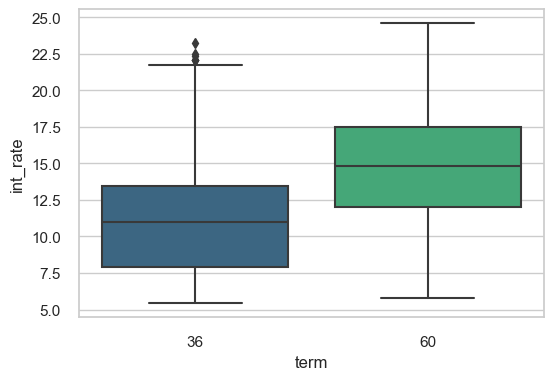

In [111]:
#box plot of int_rate and term (interest rate is higher with longer loan terms)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="term", y="int_rate", palette="viridis")

In [16]:
#distribution of purpose of getting loan in the dataset 
df["purpose"].value_counts()


debt_consolidation    18676
credit_card            5137
other                  4001
home_improvement       2985
major_purchase         2188
small_business         1831
car                    1551
wedding                 948
medical                 695
moving                  583
house                   382
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

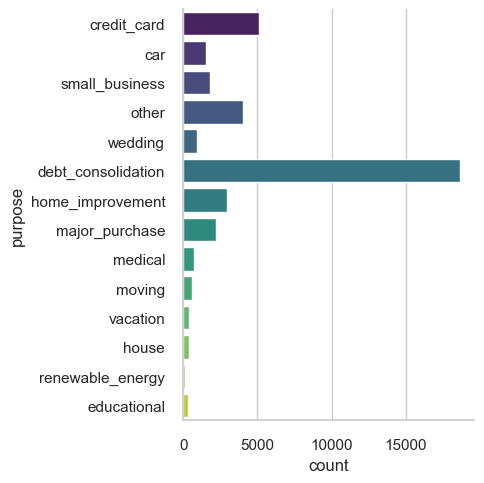

In [87]:
##distribution of purpose of getting loan in the dataset /
sns.set_style("whitegrid")
sns.catplot(
    data=df, y="purpose", kind="count",
    palette="viridis"
)

C:\Users\duygu\AppData\Local\Temp\ipykernel_10828\2308184235.py:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



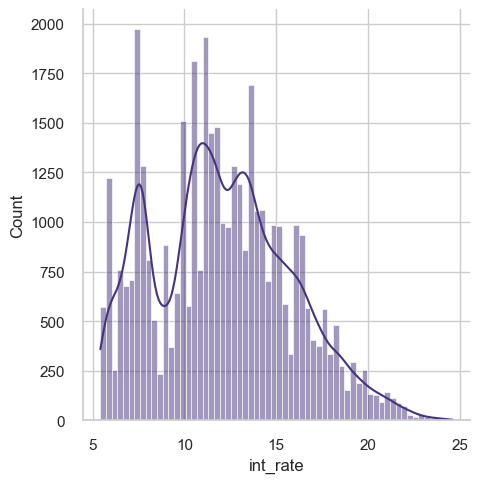

In [109]:
#distribution of the interest rate in the dataset 
sns.displot(data=df, x="int_rate", kde=True, palette="viridis")

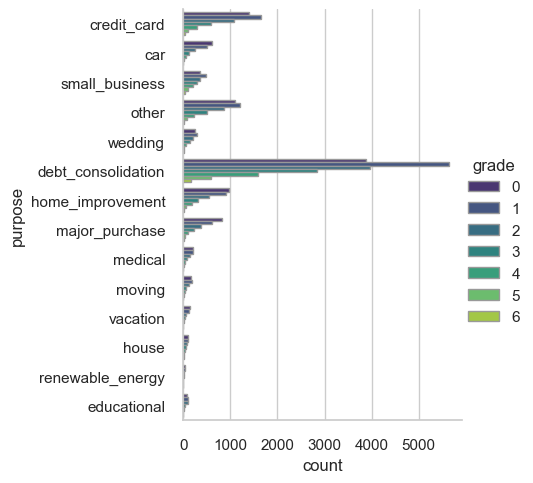

In [89]:
#
sns.catplot(
    data=df, y="purpose", hue="grade", kind="count",
    palette="viridis", edgecolor=".6",
)

<AxesSubplot:xlabel='purpose', ylabel='int_rate'>

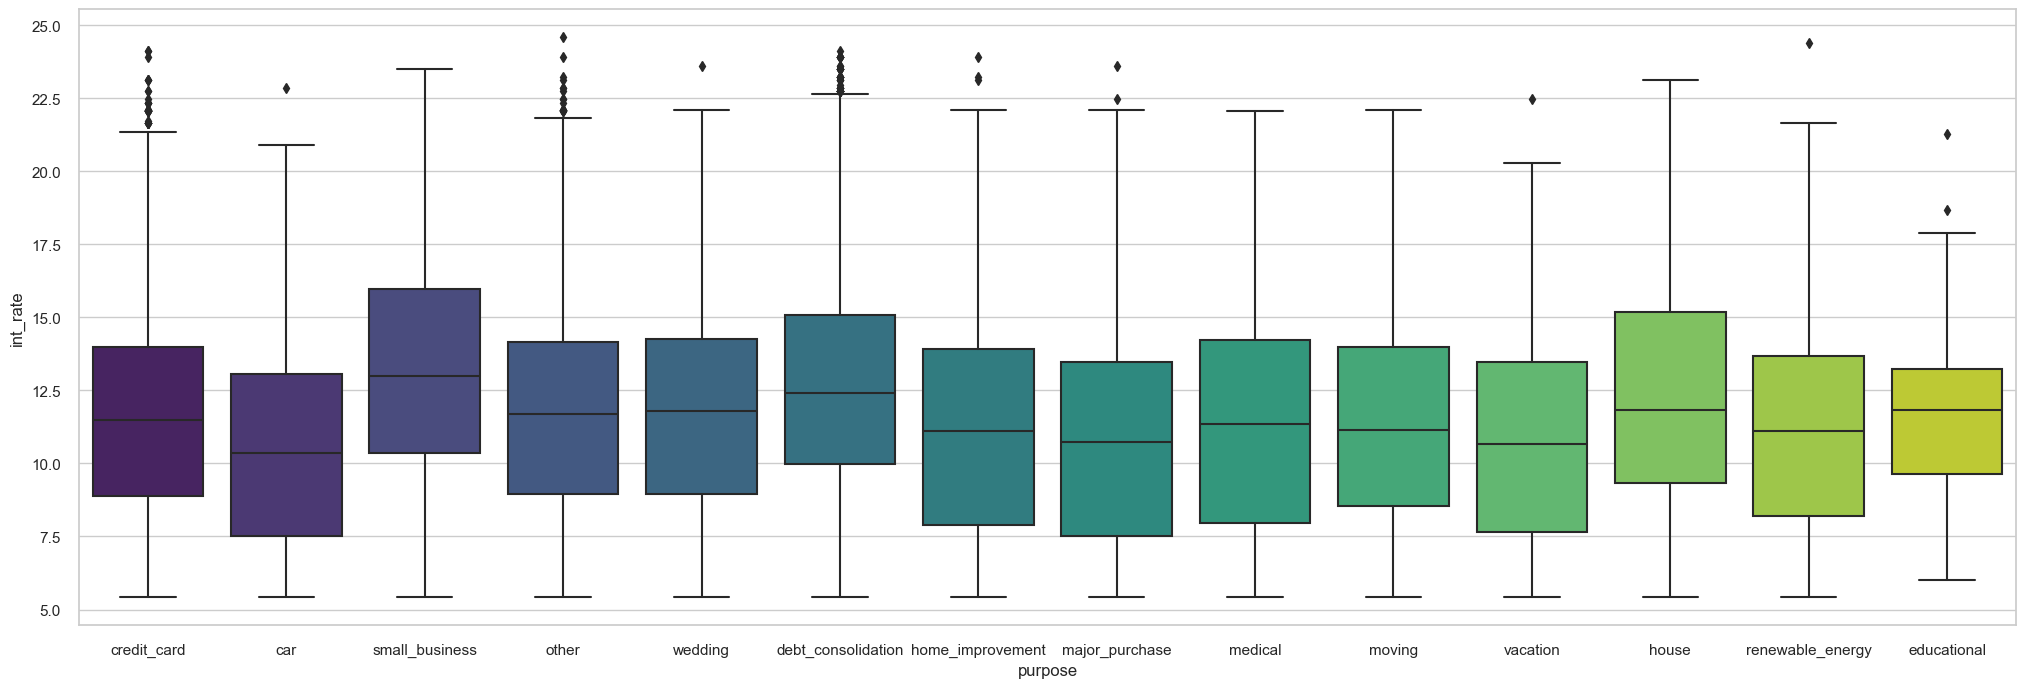

In [104]:
#box plot of int_rate and term (interest rate is higher with longer loan terms)
plt.figure(figsize=(25,8))
sns.boxplot(data=df, x="purpose", y="int_rate", palette="viridis")

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

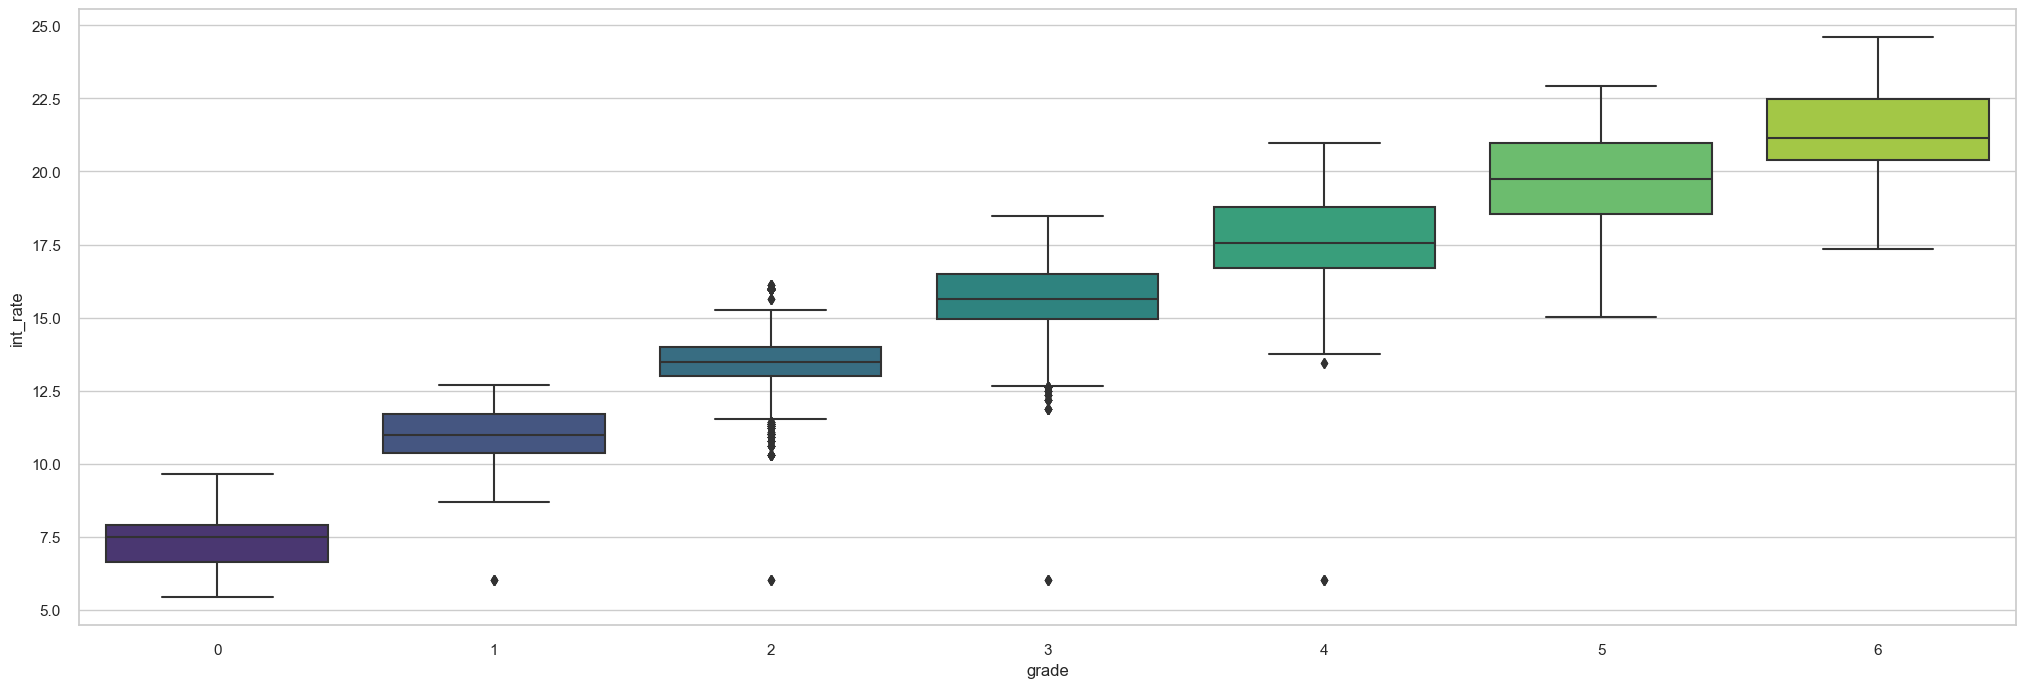

In [105]:
plt.figure(figsize=(25,8))
sns.boxplot(data=df, x="grade", y="int_rate", palette="viridis")

<AxesSubplot:xlabel='purpose', ylabel='int_rate'>

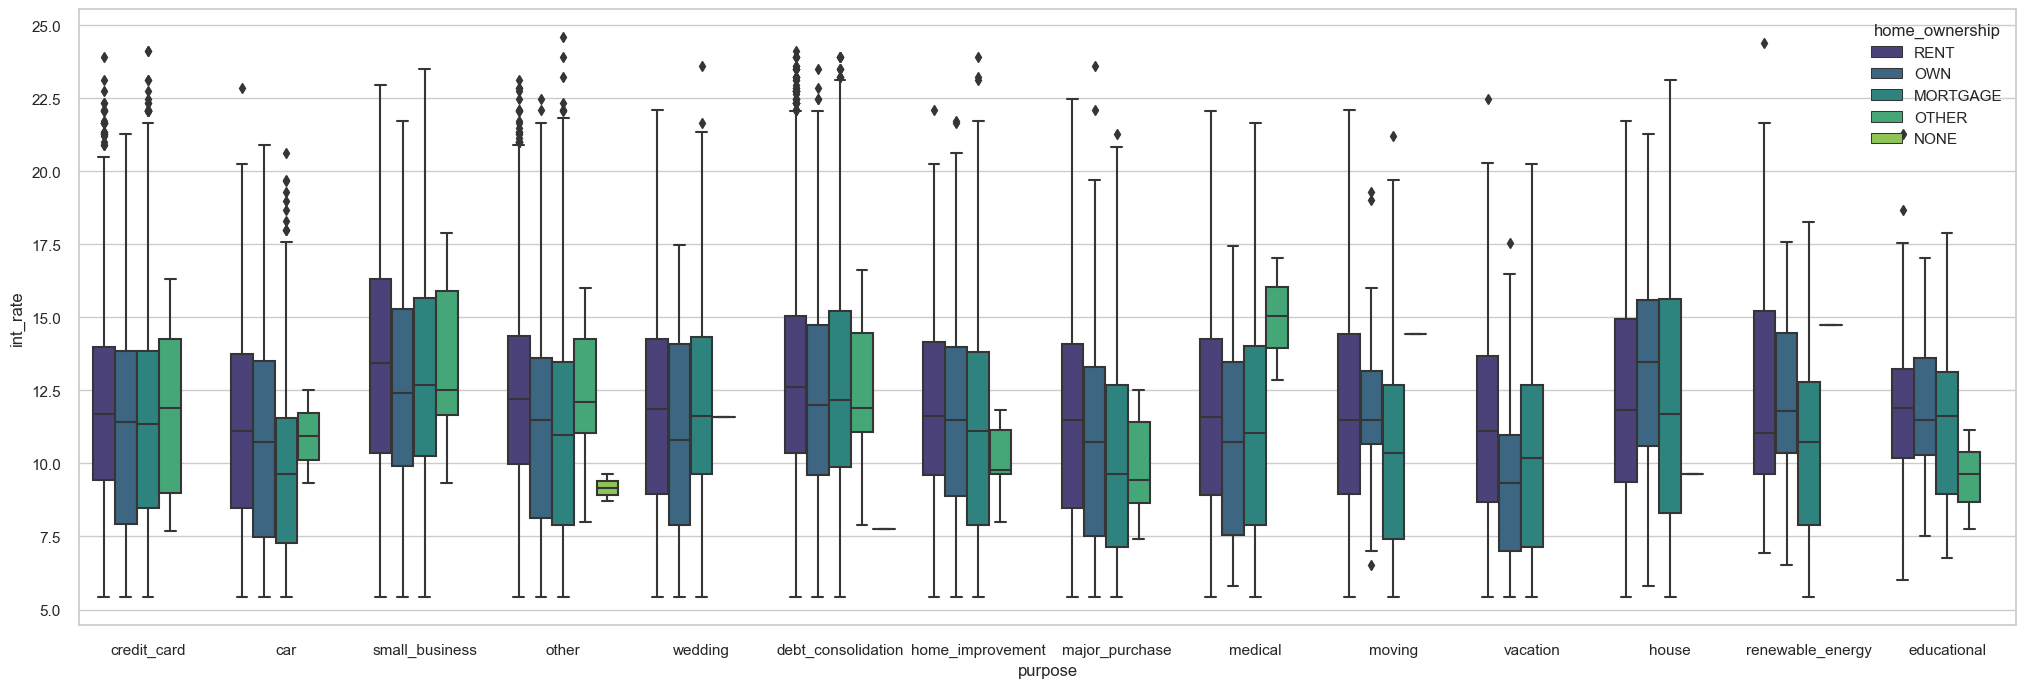

In [106]:
plt.figure(figsize=(25,8))
sns.boxplot(data=df, x="purpose", y="int_rate", hue= "home_ownership", palette= "viridis")

## Data Preparation

In [25]:
#Checking if there is any missing value in the data/ no missing value
df.isna().any().any()

False

In [27]:
df.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


In [28]:
# checking the type of the columns to know categorical values that we have to transform on the dataset
print(df.dtypes)

int_rate          float64
loan_amnt           int64
term                int64
grade              object
home_ownership     object
annual_inc        float64
purpose            object
dtype: object


In [29]:
#Changing grade column as categorical value (grade is ordinal) helps to convert each of them into respective numeric value. There are 3 steps to do that.
# 1.Changing the type of "garde" column to categorical
df["grade"] = df["grade"].astype("category")
print(df.dtypes)

int_rate           float64
loan_amnt            int64
term                 int64
grade             category
home_ownership      object
annual_inc         float64
purpose             object
dtype: object


In [30]:
# 2.Providing the correct order of categories 
df.grade =df.grade.cat.reorder_categories(["A","B","C","D","E","F","G"])

In [31]:
# 3.Encoding categories with integer values 
df.grade= df.grade.cat.codes

In [32]:
# for the nominal variables, there is no order of rank between "homeownership" or "purpose" columns.The previous approach is not useful anymore. So the transformation applied by using dummy variables approach.
# geting dummies and saving them inside new dataframe for "home_ownership" and "purpose" columns.
dummies1= pd.get_dummies(df.home_ownership)
dummies2= pd.get_dummies(df.purpose)

In [34]:
# mergng all dataframes
merged =pd.concat([df,dummies1,dummies2],axis="columns")
merged

In [36]:
#dropping categorical variables:"home_ownership","purpose" as already created dummy variables for these two column.
#dropping 2 dummy columns to avoid "dummy variable trap" in regression model.he Dummy Variable trap van happenif independent variables are multicollinear. In order to avoid this,one of the dummy variable for each categorical values was droped("moving and others")
df_final= merged.drop(["home_ownership","purpose","moving","other"], axis="columns")

In [37]:
#final dataset
df_final

,int_rate,loan_amnt,term,grade,annual_inc,MORTGAGE,NONE,OTHER,OWN,RENT,...,debt_consolidation,educational,home_improvement,house,major_purchase,medical,renewable_energy,small_business,vacation,wedding
0,10.65,5000,36,1,24000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,15.27,2500,60,2,30000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,15.96,2400,36,2,12252.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,13.49,10000,36,2,49200.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12.69,3000,60,1,80000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,8.07,2500,36,0,110000.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
39782,10.28,8500,36,2,18000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
39783,8.07,5000,36,0,100000.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
39784,7.43,5000,36,0,200000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#droping dependent value from dataset before splitting
x= df_final.drop(["int_rate"], axis="columns")
x

In [40]:
#keeping dependent value in the dataset before splitting
y=df_final["int_rate"]
y

In [42]:
#Splitting the dataset by applying random_state to use the same split of data.
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.2, random_state=42)

## Modeling

### Model 1: Multiple Linear Regresion

In [45]:
# linear regresion model fitting to x_train and y_train
model = LinearRegression().fit(x_train, y_train)

LinearRegression()


### Evaluation of Linear Regression Model

In [46]:
predictions = model.predict(x_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [ 8. 18. 18. 11. 16.  8.  8. 18. 11.  8.]
Actual labels   :  22900     5.79
27960    17.93
32773    16.45
16463    10.74
22822    14.46
12833     5.42
17036     7.66
29184    16.82
30104    10.99
26804     7.14
Name: int_rate, dtype: float64


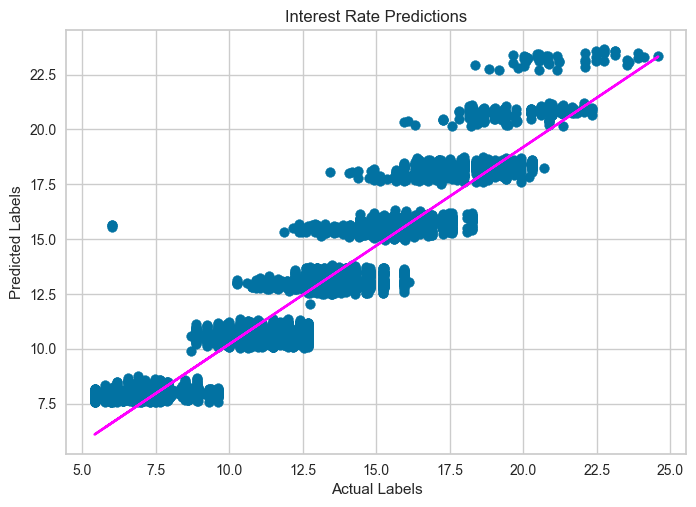

In [47]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Interest Rate Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [48]:
model.score(x_test,y_test)

0.9022602911185348

In [49]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 1.3401608423994482
RMSE: 1.157653161529587
R2: 0.9022602911185348


### Model 2: Gradient Boosting

Lasso() 

MSE: 1.959862622985153
RMSE: 1.3999509359206674
R2: 0.8570646177997056


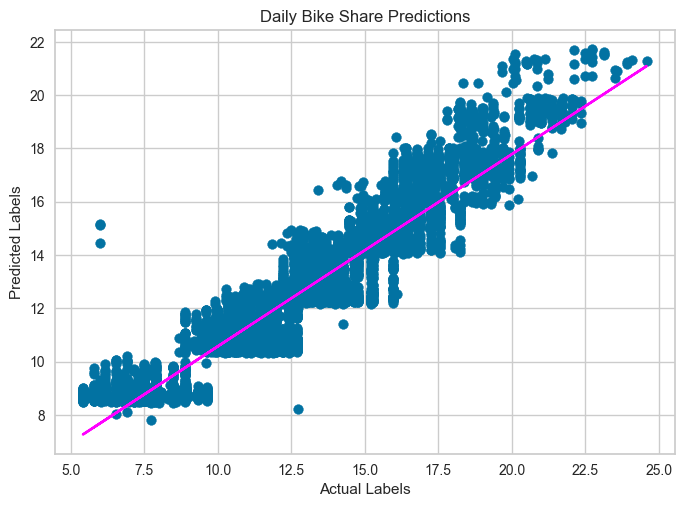

In [50]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(x_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [51]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(x_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_2 <= 1.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_12 <= 0.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_0 <= 12837.50
|   |   |   |   |   |--- feature_1 <= 48.00
|   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 4637.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 3262.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 31
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  3262.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 23
|   |   |   |   |   |   |   |   |   |--- feature_0 >  4637.50
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 52790.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 26
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  5

MSE: 1.9565152830294135
RMSE: 1.3987549045595562
R2: 0.8573087437452268


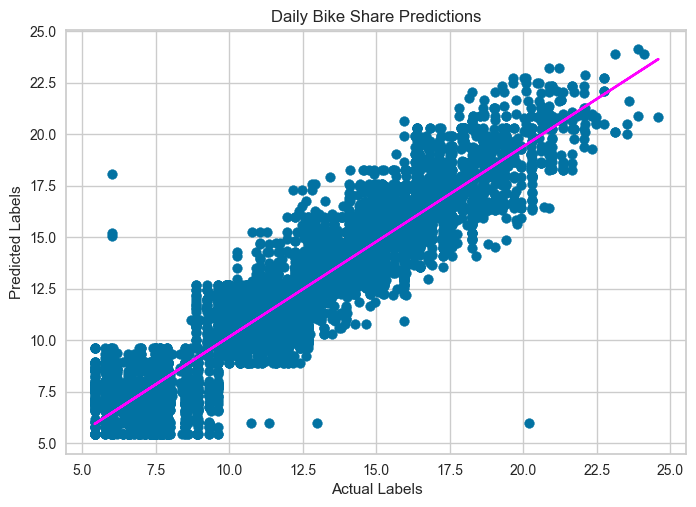

In [52]:
# Evaluate the model using the test data
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 1.1910779735837609
RMSE: 1.0913651880025133
R2: 0.9131331026022446


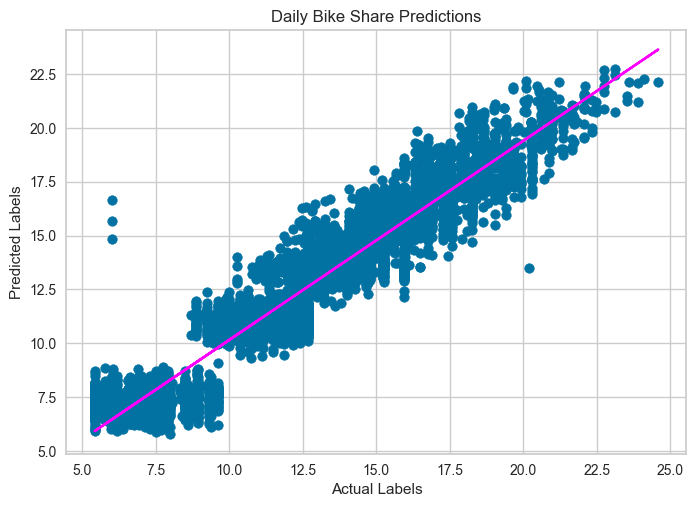

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(x_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 1.008508914000633
RMSE: 1.0042454450982752
R2: 0.9264481064210915


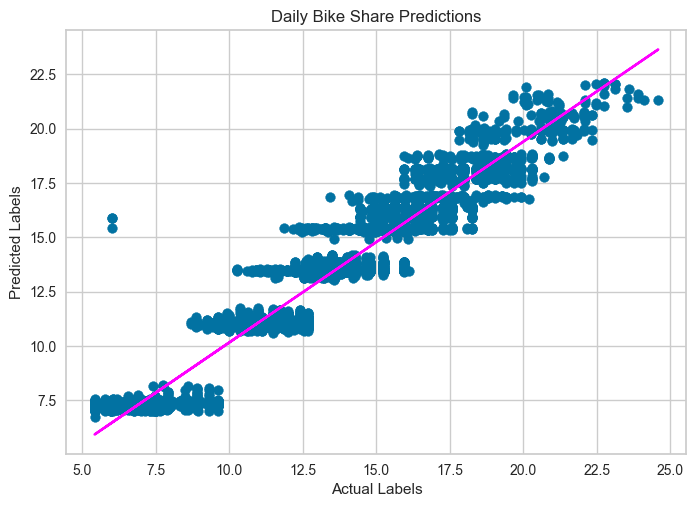

In [54]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(x_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()